In [80]:
import pandas as pd


In [1]:
!pip install geopy

     |████████████████████████████████| 125 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 3.1 MB/s eta 0:00:011


In [33]:
!pip install seaborn

     |████████████████████████████████| 294 kB 12.4 MB/s eta 0:00:01


In [12]:
# Это выполняется 1 раз при загруке, для распаковки архива пользователя
'''
from zipfile import ZipFile, ZIP_DEFLATED
import os
import shutil


def extract_zip(zip_file_path, extracted_folder_path, encoding='cp866'):
    os.makedirs(extracted_folder_path, exist_ok=True)

    with ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            file_info.filename = file_info.filename.encode('cp437').decode(encoding)
            try:
                zip_ref.extract(file_info, extracted_folder_path)
            except KeyError:
                # Если это папка, создаем папку в extracted_folder_path
                os.makedirs(os.path.join(extracted_folder_path, file_info.filename), exist_ok=True)




# Указать путь к вашему архиву .zip
zip_file_path = 'data/gis_rubrik/gis_rubrik.zip'
# Указать папку, в которую будут распакованы файлы
extracted_folder_path = 'data/gis_rubrik/unzip/'

# Распаковываем архив
extract_zip(zip_file_path, extracted_folder_path)

'''


In [81]:
# Чтение xlsx
def find_xlsx_files(root_folder):
    xlsx_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.xlsx'):
                xlsx_files.append(os.path.join(root, file))
    return xlsx_files

def read_xlsx_files(xlsx_files):
    for xlsx_file in xlsx_files:
        df = pd.read_excel(xlsx_file)
        
        print(f"Содержимое файла {xlsx_file}:\n{df}\n")
        
# Ищем все .xlsx файлы в распакованной папке (рекурсивно)
xlsx_files = find_xlsx_files(extracted_folder_path)



In [111]:
# Пользователь указывает РЕЛЕВАНТНЫЕ для него категории, например:
# Россия, строительство, недвижимость  - это также результат парсинга пользовательского ввода из форм в веб-интерфейсе..
search_keywords = ["Россия", "мужская одежда"]

def contains_keywords(string, keywords):
    return all(keyword.lower() in string.lower() for keyword in keywords)
    
def filter(df):
    df = df.dropna(subset=['Широта', 'Долгота'])
    return df
all_df = []
naming = []
for i in xlsx_files:
    if contains_keywords(i,search_keywords):
        naming.append(i.split('/')[-1].replace('.xlsx',''))
        df = pd.read_excel(i)
        df = filter(df)
        all_df.append(df)


In [112]:
naming

['Мужская одежда']

In [68]:
len(all_df)

4

In [113]:
# Определяем местоположение, близкое к нам.

from geopy.distance import geodesic



# Введите координаты, относительно которых вы хотите фильтровать, можно получить так же из web-интерфейса
# парсингом ip адреса -> получение координат по ip (можно по API..)
#latitude = 55.7522
#longitude = 37.6156
user_latitude = '55.7522'  #float(input("Введите вашу широту: "))
user_longitude = '37.6156'#float(input("Введите вашу долготу: "))

radius = 3

# Определение расстояния и фильтрация DataFrame
df['Расстояние (В км)'] = df.apply(lambda row: geodesic((row['Широта'], row['Долгота']), (user_latitude, user_longitude)).km, axis=1)
df_filtered = df[df['Расстояние (В км)'] < radius]

# Вывод отфильтрованного DataFrame
df_filtered

,ID,Название,Регион,Район,Город,Район города,Адрес,Индекс,Телефон,Мобильный телефон,...,youtube,twitter,skype,icq,googleplus,linkedin,pinterest,Широта,Долгота,Расстояние (В км)
3681,0,"Canali, магазин мужской одежды",NaN,NaN,Москва,Тверской район,"Тверская улица, 26/1",125009.0,+7 (495) 641‒21‒89,NaN,...,https://youtube.com/user/canali1934/featured,https://twitter.com/canali1934,NaN,NaN,NaN,NaN,https://pinterest.com/canali1934,55.768360,37.599313,2.069449
3692,0,"Bml, магазин мужской одежды",NaN,NaN,Москва,Басманный район,"Земляной Вал улица, 33",105064.0,+7 (495) 151‒30‒71,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.756807,37.659622,2.811230
3693,0,"Burberry, бутик одежды",NaN,NaN,Москва,Тверской район,"Красная площадь, 3",109012.0,+7 (499) 951‒95‒92,NaN,...,NaN,https://twitter.com/burberry_russia,NaN,NaN,NaN,NaN,NaN,55.753813,37.622390,0.462624
3700,0,"Etro, бутик одежды",NaN,NaN,Москва,Арбат район,"улица Новый Арбат, 19",127025.0,+7 (495) 660‒05‒50,NaN,...,https://youtube.com/EtroOfficial,https://twitter.com/EtroOfficial,NaN,NaN,NaN,NaN,NaN,55.752205,37.588342,1.711568
3701,0,"Suit factory, бутик мужской и женской одежды и...",NaN,NaN,Москва,Тверской район,"улица Малая Дмитровка, 8 ст1",127006.0,+7 (495) 933‒35‒85,+7‒985‒682‒29‒02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.768420,37.606298,1.897964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43480,0,"Arthur Shepard, бутик мужской классической одежды",NaN,NaN,Москва,Якиманка район,"улица Большая Якиманка, 17/2 ст1",119180.0,NaN,+7‒989‒579‒69‒27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.738097,37.615665,1.570194
43486,0,Nrk87,NaN,NaN,Москва,Арбат район,"Новинский бульвар, 18 ст1",121069.0,8‒800‒555‒27‒21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.754687,37.584543,1.969611
43497,0,Jeans club,NaN,NaN,Москва,Тверской район,"Красная площадь, 3",109012.0,+7 (495) 980‒65‒95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.754423,37.621026,0.421108
43601,0,"Mark Formelle, Офис",NaN,NaN,Москва,Арбат район,"улица Арбат, 24",119002.0,8‒800‒707‒56‒38,NaN,...,https://youtube.com/channel/UCXcHttoKh0nsvCPTT...,NaN,NaN,NaN,NaN,NaN,NaN,55.749944,37.592521,1.470811


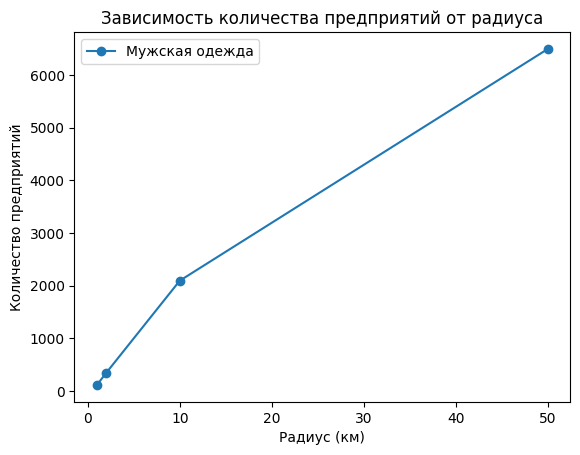

In [114]:
# Определение разных радиусов
radius_values = [1, 2, 10, 50]

# Создание списка для хранения количества точек для каждого радиуса


# Итерация по разным DataFrame и определение количества точек для каждого радиуса
for i in range(len(all_df)):
    points_count = []
    df = all_df[i]
    name = naming[i]
    for radius in radius_values:
        df['Расстояние (В км)'] = df.apply(lambda row: geodesic((row['Широта'], row['Долгота']), (user_latitude, user_longitude)).km, axis=1)
        df_filtered = df[df['Расстояние (В км)'] < radius]
        points_count.append(len(df_filtered))
    
    # Построение линии для каждого DataFrame с меткой name
    plt.plot(radius_values, points_count, marker='o', label=name)

# Настройка графика
plt.title('Зависимость количества предприятий от радиуса')
plt.xlabel('Радиус (км)')
plt.ylabel('Количество предприятий')
plt.legend()
plt.show()

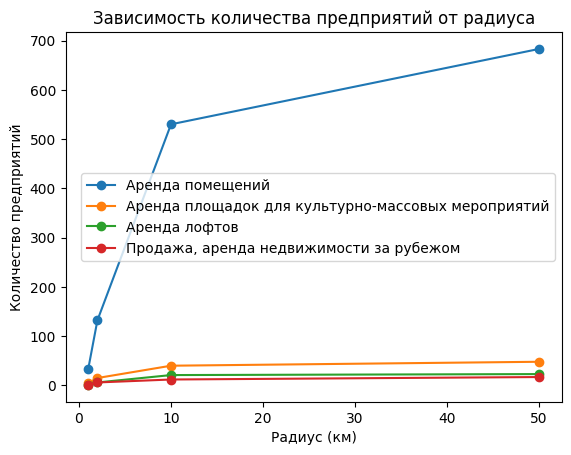

In [79]:
# Определение разных радиусов
radius_values = [1, 2, 10, 50]

# Создание списка для хранения количества точек для каждого радиуса


# Итерация по разным DataFrame и определение количества точек для каждого радиуса
for i in range(len(all_df)):
    points_count = []
    df = all_df[i]
    name = naming[i]
    for radius in radius_values:
        df['Расстояние (В км)'] = df.apply(lambda row: geodesic((row['Широта'], row['Долгота']), (user_latitude, user_longitude)).km, axis=1)
        df_filtered = df[df['Расстояние (В км)'] < radius]
        points_count.append(len(df_filtered))
    
    # Построение линии для каждого DataFrame с меткой name
    plt.plot(radius_values, points_count, marker='o', label=name)

# Настройка графика
plt.title('Зависимость количества предприятий от радиуса')
plt.xlabel('Радиус (км)')
plt.ylabel('Количество предприятий')
plt.legend()
plt.show()

In [ ]:
# Далее ноутбук с транзакциями

In [116]:

df_oborot = pd.read_excel("data/Приложение_4_Реестр_по_оборотам_для_кейса.xlsx")
df_oborot

,Клиент,Сегмент,Пол,Возраст,Город,Авто,АЗС,Аренда авто,Дом и ремонт,Животные,...,Спортивные товары,Супермаркеты,Такси,Техника,Транспорт,Фастфуд,"Фастфуд, кафе, рестораны",Цветы,Цифровые товары,Ювелирные изделия
0,A30660,MAFFLUENT,М,52,Москва,1260,,,,,...,,41673.9225,,,,1939.245,4354.245,,,
1,A33302,MASS,Ж,68,Москва,,1603.35,,171563.196,,...,,8527.617,,,,,,598.5,,
2,A33536,AFFLUENT,М,53,Москва,735,15722.2695,,101096.31,,...,,50179.92,9359.4375,5659.5,1692.6,7251.2475,22822.7475,,418.95,51650.55
3,A33717,AFFLUENT,М,55,Москва,,,,,,...,,81246.9735,7081.2525,,2283.75,1472.1,1472.1,,,
4,A33805,AFFLUENT,М,51,Москва,1890,4604.775,,,,...,,769.65,,,5742.66,9871.05,9871.05,6321,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65440,AHJ6SV,MAFFLUENT,Ж,38,Красногорск,5532.45,13161.75,0,0,0,...,0,26167.5015,0,109.2,130.2,6754.755,6754.755,0,105,0
65441,AHJ6T5,AFFLUENT,М,36,Москва,0,0,0,102618.6,0,...,29145.9,30075.4125,0,0,58.8,1333.5,12988.5,13076.7,313.95,0
65442,AHJ6T8,MAFFLUENT,М,33,Москва,0,0,0,299.25,0,...,0,27473.7435,581.7,0,337.05,1424.85,1424.85,0,1466.85,0
65443,AHJ6U7,MAFFLUENT,Ж,42,Москва,0,0,0,0,0,...,0,10914.5505,0,0,914.55,1749.3,1959.3,0,0,0


In [117]:
print(len(df_oborot))

65445


In [118]:
selected_cities = ['Москва']
df_oborot = selected_df
# Оставляем только строки с выбранными городами
df_oborot = df_oborot[df_oborot['Город'].isin(selected_cities)]
# Значения координат
latitude = 55.7522
longitude = 37.6156

# Добавление новых столбцов со значениями координат
df_oborot['Широта'] = latitude
df_oborot['Долгота'] = longitude

/tmp/ipykernel_1177930/4242147871.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oborot['Широта'] = latitude
/tmp/ipykernel_1177930/4242147871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oborot['Долгота'] = longitude


In [119]:
df_oborot.columns
# Тут опять, в веб интерфейсе пользователь должен выбрать одну/несколько категорий в которых будет действовать его бизнес.

Index(['Клиент', 'Сегмент', 'Пол', 'Возраст', 'Город', 'Авто', 'АЗС',
       'Аренда авто', 'Дом и ремонт', 'Животные', 'Здоровье',
       'Кафе и рестораны', 'Книги', 'Коммунальные услуги', 'Красота',
       'Образование', 'Одежда и обувь', 'Путешествия', 'Развлечения',
       'Связь, интернет и ТВ', 'Спортивные товары', 'Супермаркеты', 'Такси',
       'Техника', 'Транспорт', 'Фастфуд', 'Фастфуд, кафе, рестораны', 'Цветы',
       'Цифровые товары', 'Ювелирные изделия', 'Широта', 'Долгота'],
      dtype='object')

In [129]:
df_oborot = df_oborot.dropna(subset=['Одежда и обувь', ])
df_oborot = df_oborot[df_oborot['Одежда и обувь'] != ' ']
df_oborot['Одежда и обувь'] = df_oborot['Одежда и обувь'].astype(float)
df_oborot['Одежда и обувь'].unique()

array([1.5750000e+03, 2.6145000e+02, 5.9934000e+03, ..., 3.5190225e+05,
       1.9140450e+04, 1.1154150e+04])

In [132]:
# Применяем фильтры, для магазинов мужской одежды - Пол 'М'
df_filtered = df_oborot[(df_oborot['Пол'] == 'М') & (df_oborot['Одежда и обувь']>0)]
df_filtered
print('Всего клиентов:', len(df_filtered),'Возможная выручка=', df_oborot['Одежда и обувь'].sum())
#df_oborot['Одежда и обувь'].sum()

Всего клиентов: 2351 Возможная выручка= 90514907.35350001


In [106]:
df

,Клиент,Сегмент,Пол,Возраст,Город,Авто,АЗС,Аренда авто,Дом и ремонт,Животные,...,Такси,Техника,Транспорт,Фастфуд,"Фастфуд, кафе, рестораны",Цветы,Цифровые товары,Ювелирные изделия,Широта,Долгота
0,A30660,MAFFLUENT,М,52,Москва,1260,,,,,...,,,,1939.245,4354.245,,,,55.7522,37.6156
1,A33302,MASS,Ж,68,Москва,,1603.35,,171563.196,,...,,,,,,598.5,,,55.7522,37.6156
2,A33536,AFFLUENT,М,53,Москва,735,15722.2695,,101096.31,,...,9359.4375,5659.5,1692.6,7251.2475,22822.7475,,418.95,51650.55,55.7522,37.6156
3,A33717,AFFLUENT,М,55,Москва,,,,,,...,7081.2525,,2283.75,1472.1,1472.1,,,,55.7522,37.6156
4,A33805,AFFLUENT,М,51,Москва,1890,4604.775,,,,...,,,5742.66,9871.05,9871.05,6321,,,55.7522,37.6156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65439,AHJ6S2,AFFLUENT,М,40,Москва,0,1541.484,0,342.405,0,...,0,0,0,470.4,470.4,0,0,0,55.7522,37.6156
65441,AHJ6T5,AFFLUENT,М,36,Москва,0,0,0,102618.6,0,...,0,0,58.8,1333.5,12988.5,13076.7,313.95,0,55.7522,37.6156
65442,AHJ6T8,MAFFLUENT,М,33,Москва,0,0,0,299.25,0,...,581.7,0,337.05,1424.85,1424.85,0,1466.85,0,55.7522,37.6156
65443,AHJ6U7,MAFFLUENT,Ж,42,Москва,0,0,0,0,0,...,0,0,914.55,1749.3,1959.3,0,0,0,55.7522,37.6156


In [105]:
print(df['Город'].unique())



['Москва']
